### Bioler Plate

In [ ]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install indic-transliteration

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/ritwikmishra/devanagari-to-roman-script-transliteration.git
%cd devanagari-to-roman-script-transliteration
!python3 createDict.py

Cloning into 'devanagari-to-roman-script-transliteration'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (5/5), done.
remote: Total 27 (delta 4), reused 4 (delta 4), pack-reused 22
Unpacking objects: 100% (27/27), 19.42 KiB | 1.94 MiB/s, done.
/content/devanagari-to-roman-script-transliteration/devanagari-to-roman-script-transliteration


In [ ]:
pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Introduction

In recent times, there has been an increasing need for accurate readability assessment of text in various languages. Readability assessment is the process of evaluating how easy or difficult a text is to read and understand. This is an important aspect of text processing and analysis as it helps to determine the target audience for the text and to improve its readability. In this project, we have developed a readability calculator that can accurately assess the readability of Hindi texts.

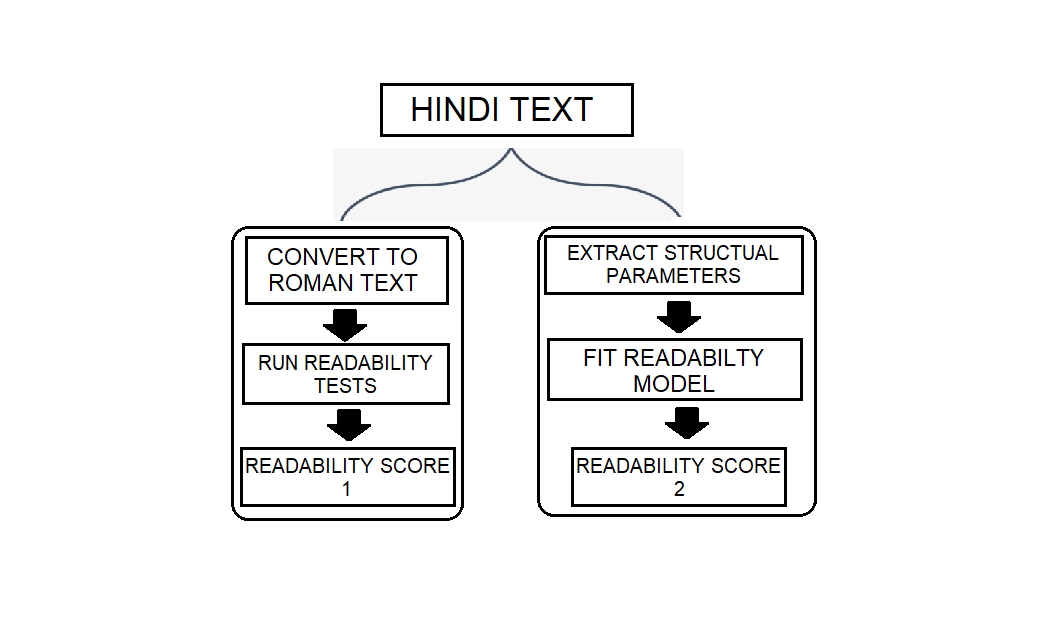

We have implemented two models to obtain readability scores from hindi text, which have been described in the image above. The first model was implemented with the help of multiple libraries mentioned below. We have followed ([Sinha et al., 2012](https://aclanthology.org/C12-2111.pdf)) for the second model but have implemented a different method to count the sylabbles/matras which is essential to the model.  

We are using a labelled dataset to test the models' efficacy. The dataset consists of 14 grades, ranging from 'Grade 1' to 'Post-Graduate' level, where UnderGraduate and Postgraduate are considered as grades 13 and 14 respectively. The hindi text for Grades 1-12 was taken from [NCERT books](https://philoid.com/ncert/class/1#HI). The '' & '' books were used for UG text and '' & '' for PG text after consulting ChatGPT and a Hindi professor. The volume of text is not consistent across grades with lower grades having lower text volume. 

### Method 1 - Transliteration

Devanagari text will be inputed by the model and will be converted to roman to obtain readability scores using existing methods.

In [ ]:
text_dict={'devanagari':"",'roman':{}}

text_dict['devanagari']="""महर्षि पिंगल का 'छन्दःशास्त्र' आठ अलग-अलग अध्यायों में विभक्त है। 
आठवे अध्याय में पिंगल ने छंदों को संक्षेप करने तथा उनके वर्गीकरण के बारे में लिखा है तथा द्विआधारीय रचनाओं को गणितीय रूप में लिखने के बारे में बताया।
[1] इनके छंदों की लम्बाई नापने के लिए वर्णों की लम्बाई या उसके उच्चारण में लगने वाले समय के आधार पर उसे दो भागों में बांटा जा सकता है-"""

#### Indic_transliteration

In [ ]:
from indic_transliteration import sanscript
from indic_transliteration.sanscript import SchemeMap, SCHEMES, transliterate

In [ ]:
print('ORIGINAL:', text_dict['devanagari'],'\n')
print('HK:',transliterate(text_dict['devanagari'], sanscript.DEVANAGARI, sanscript.HK),'\n')
print('IAST:',transliterate(text_dict['devanagari'], sanscript.DEVANAGARI, sanscript.IAST),'\n')
print('ITRANS:',transliterate(text_dict['devanagari'], sanscript.DEVANAGARI, sanscript.ITRANS),'\n')
print('OPTITRANS:',transliterate(text_dict['devanagari'], sanscript.DEVANAGARI, sanscript.OPTITRANS),'\n')
print('KOLKATA:',transliterate(text_dict['devanagari'], sanscript.DEVANAGARI, sanscript.KOLKATA),'\n')
print('KOLKATA_v2:',transliterate(text_dict['devanagari'], sanscript.DEVANAGARI, sanscript.KOLKATA_v2),'\n')
print('SLP1:',transliterate(text_dict['devanagari'], sanscript.DEVANAGARI, sanscript.SLP1),'\n')
print('VELTHUIS:',transliterate(text_dict['devanagari'], sanscript.DEVANAGARI, sanscript.VELTHUIS),'\n')
print('WX:',transliterate(text_dict['devanagari'], sanscript.DEVANAGARI, sanscript.WX),'\n')

ORIGINAL: महर्षि पिंगल का 'छन्दःशास्त्र' आठ अलग-अलग अध्यायों में विभक्त है। 
आठवे अध्याय में पिंगल ने छंदों को संक्षेप करने तथा उनके वर्गीकरण के बारे में लिखा है तथा द्विआधारीय रचनाओं को गणितीय रूप में लिखने के बारे में बताया।
[1] इनके छंदों की लम्बाई नापने के लिए वर्णों की लम्बाई या उसके उच्चारण में लगने वाले समय के आधार पर उसे दो भागों में बांटा जा सकता है- 

HK: maharSi piMgala kA 'chandaHzAstra' ATha alaga-alaga adhyAyoM meM vibhakta hai| 
AThave adhyAya meM piMgala ne chaMdoM ko saMkSepa karane tathA unake vargIkaraNa ke bAre meM likhA hai tathA dviAdhArIya racanAoM ko gaNitIya rUpa meM likhane ke bAre meM batAyA|
[1] inake chaMdoM kI lambAI nApane ke lie varNoM kI lambAI yA usake uccAraNa meM lagane vAle samaya ke AdhAra para use do bhAgoM meM bAMTA jA sakatA hai- 

IAST: maharṣi piṃgala kā 'chandaḥśāstra' āṭha alaga-alaga adhyāyoṃ meṃ vibhakta hai| 
āṭhave adhyāya meṃ piṃgala ne chaṃdoṃ ko saṃkṣepa karane tathā unake vargīkaraṇa ke bāre meṃ likhā hai tathā dviādhārīya racanāoṃ k

We can use multiple transliteration methods to romanise devanagiri text. As we can see from the above transliterations, the conversions may be formally accurate but are not intuitive to the average reader due to the extensive usage of diacritics and irregular usage of capitalised text and punctuations.

#### Rithwik Mishra

In [ ]:
# -*- coding: utf-8 -*-
import csv
import sys

def devan_to_roman_rith(content):

  reader = csv.reader(open('svar.csv', 'r'))
  vowels = {}
  for row in reader:
    k, v = row
    vowels[k] = v

  reader = csv.reader(open('vyanjan.csv', 'r'))
  consonants = {}
  for row in reader:
    k, v = row
    consonants[k] = v

  #content=text_dict['devanagari'].split('\n')

  str1 = ""

  for x in content:
    for y in x.split():
      for i in range(len(y)):
        if (i+1<len(y) and y[i+1].strip()==' ़'.strip()):
          c = y[i]+y[i+1]
          p=2
        else:
          c = y[i]
          p=1
        if (c in vowels.keys()):
          str1 = str1 + vowels[c]
        elif (c in consonants.keys()):
          if(i+p<len(y) and y[i+p] in consonants.keys()):
            if ((c=='झ' and i!=0) or (i!=0 and i+p+1<len(y) and y[i+p+1] in vowels.keys())): # add 'a' after 'jh', only if झ appears in the starting of the word
              str1 = str1 + consonants[c]
            else:
              str1 = str1 + consonants[c]+'a'
          else:
            str1 = str1 + consonants[c]
        elif y[i] in ['\n','\t',' ','!',',','।','-',':','\\','_','?'] or c.isalnum():
          str1 = str1 + c.replace('।','.')
      str1 = str1 + " "
    str1 = str1 + "\n"

  return str1.strip()

In [ ]:
text_dict['roman']['rithwik']=devan_to_roman_rith(text_dict['devanagari'].split('\n'))
print(text_dict['roman']['rithwik'])

maharshi pingal ka chhandashastr aath alag-alag adhyayon men vibhakt hai. 
aathve adhyay men pingal ne chhndon ko snkshep karne tatha unke vargikaran ke bare men likha hai tatha dviaadhariy rachnaon ko ganitiy roop men likhne ke bare men bataya. 
1 inke chhndon ki lambaee napne ke lie varnon ki lambaee ya uske uchcharan men lagne vale samay ke aadhar par use do bhagon men banta ja sakta hai-


More intituitive methods of conversion exist where essentially a mapping from devanagiri to roman (अ-a, आ-aa, इ-i) is stored and used for conversion. The output seems far more intuitive to the average reader. A similar method is usually used by the average user in everyday conversations on platforms like WhatsApp. 

#### Summary

In [ ]:
from unidecode import unidecode

#function to convert text from devanagiri to roman inputting the text and conversion method and returning roman text
def devanagari_to_roman(devanagiri_text,method):
  if method=='unidecode':
    roman_text=unidecode(devanagiri_text)
  elif method=='rithwik':
    roman_text=devan_to_roman_rith(devanagiri_text.split('\n'))
  elif method=='HK':
    roman_text=transliterate(devanagiri_text, sanscript.DEVANAGARI, sanscript.HK)
  elif method=='IAST':
    roman_text=transliterate(devanagiri_text, sanscript.DEVANAGARI, sanscript.IAST)
  elif method=='ITRANS':
    roman_text=transliterate(devanagiri_text, sanscript.DEVANAGARI, sanscript.ITRANS)
  elif method=='OPTITRANS':
    roman_text=transliterate(devanagiri_text, sanscript.DEVANAGARI, sanscript.OPTITRANS)
  elif method=='KOLKATA':
    roman_text=transliterate(devanagiri_text, sanscript.DEVANAGARI, sanscript.KOLKATA)
  elif method=='KOLKATA_v2':
    roman_text=transliterate(devanagiri_text, sanscript.DEVANAGARI, sanscript.KOLKATA_v2)
  elif method=='SLP1':
    roman_text=transliterate(devanagiri_text, sanscript.DEVANAGARI, sanscript.SLP1)
  elif method=='VELTHUIS':
    roman_text=transliterate(devanagiri_text, sanscript.DEVANAGARI, sanscript.VELTHUIS)
  elif method=='WX':
    roman_text=transliterate(devanagiri_text, sanscript.DEVANAGARI, sanscript.WX)

  return roman_text

In [ ]:
methods=['rithwik','unidecode','KOLKATA_v2'] #handpicked conversion methods

for meth in methods:

  text_dict['roman'][meth]=devanagari_to_roman(devanagiri_text=text_dict['devanagari'],method=meth)

print('Original:',text_dict['devanagari'],'\n')
for key in text_dict['roman'].keys():
  print(key+': ',text_dict['roman'][key],'\n')


Original: महर्षि पिंगल का 'छन्दःशास्त्र' आठ अलग-अलग अध्यायों में विभक्त है। 
आठवे अध्याय में पिंगल ने छंदों को संक्षेप करने तथा उनके वर्गीकरण के बारे में लिखा है तथा द्विआधारीय रचनाओं को गणितीय रूप में लिखने के बारे में बताया।
[1] इनके छंदों की लम्बाई नापने के लिए वर्णों की लम्बाई या उसके उच्चारण में लगने वाले समय के आधार पर उसे दो भागों में बांटा जा सकता है- 

rithwik:  maharshi pingal ka chhandashastr aath alag-alag adhyayon men vibhakt hai. 
aathve adhyay men pingal ne chhndon ko snkshep karne tatha unke vargikaran ke bare men likha hai tatha dviaadhariy rachnaon ko ganitiy roop men likhne ke bare men bataya. 
1 inke chhndon ki lambaee napne ke lie varnon ki lambaee ya uske uchcharan men lagne vale samay ke aadhar par use do bhagon men banta ja sakta hai- 

unidecode:  mhrssi piNgl kaa 'chndHshaastr' aatth alg-alg adhyaayoN meN vibhkt hai /  
aatthve adhyaay meN piNgl ne chNdoN ko sNkssep krne tthaa unke vrgiikrnn ke baare meN likhaa hai tthaa dviaadhaariiy rcnaaoN ko gnnitiiy ruup 

#### Reading Level Check

We can now check the readability of the romanised text using conventional methods such as 'Flesch Reading Ease', 'Flesch-Kincaid Grade Level' & 'Smog Index.'

In [ ]:
import textstat 

flesch_reading_ease=textstat.flesch_reading_ease(text_dict['roman']['rithwik'])
flesch_kincaid_grade=textstat.flesch_kincaid_grade(text_dict['roman']['rithwik'])
smog_index=textstat.smog_index(text_dict['roman']['rithwik'])

print(f'flesch_reading_ease: {flesch_reading_ease}\nflesch_kincaid_grade:{flesch_kincaid_grade}\nsmog_index:{smog_index}')

flesch_reading_ease: 65.35
flesch_kincaid_grade:9.8
smog_index:11.2


#### Final Test

In [ ]:
import os 

files=os.listdir('../data/')

data_dict={}
for file in files:
  if '.txt' in file:

    # Open the file for reading
    with open('../data/'+file,'r') as f:
        # Read the contents of the file
        contents = f.read()
        contents=contents.replace('\n','')

    data_dict[file[:-4]]=contents

order=['Class 1','Class 2','Class 3','Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10', 'Class 11', 'Class 12', 'UG', 'PG']
data_dict={key: data_dict[key] for key in order}

In [ ]:
roman_dict={}
diff_dict={}
methods=['rithwik','KOLKATA_v2','HK','ITRANS']

for meth in methods:
  roman_dict[meth]={}
  diff_dict[meth]={}

  for key in data_dict.keys():

    #hindi to roman  
    roman_dict[meth][key]=devanagari_to_roman(devanagiri_text=data_dict[key],method=meth)

    #difficulty in roman
    diff_dict[meth][key]={}
    diff_dict[meth][key]['ease']=textstat.flesch_reading_ease(roman_dict[meth][key])
    diff_dict[meth][key]['grade']=textstat.flesch_kincaid_grade(roman_dict[meth][key])
    diff_dict[meth][key]['smog']=textstat.smog_index(roman_dict[meth][key])

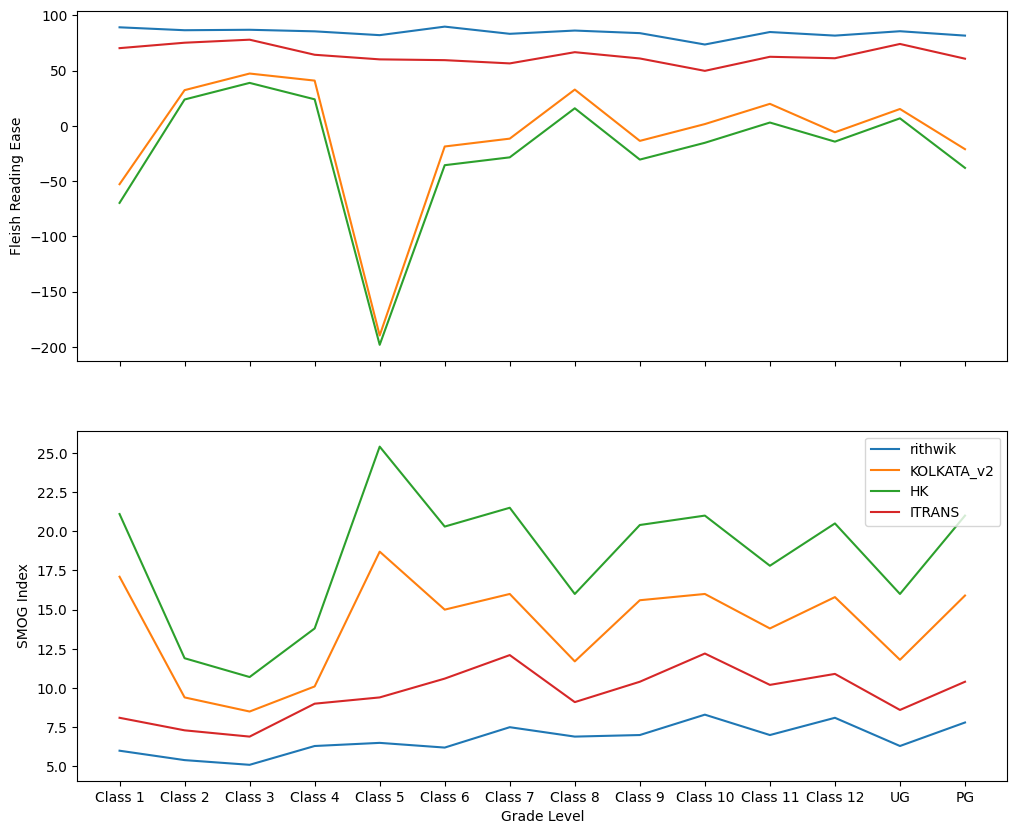

In [ ]:
import matplotlib.pyplot as plt

fig,axs=plt.subplots(2,figsize=(12,10),sharex=True)

for method in diff_dict:

  ease_list,grade_list,smog_list=([] for i in range(3))
  
  for key in diff_dict[method]:
    ease_list.append(diff_dict[method][key]['ease'])
    grade_list.append(diff_dict[method][key]['grade'])
    smog_list.append(diff_dict[method][key]['smog'])

  axs[0].plot(diff_dict[method].keys(),ease_list,label=method)
  axs[1].plot(diff_dict[method].keys(),smog_list,label=method)

axs[0].set_ylabel('Fleish Reading Ease')
axs[1].set_ylabel('SMOG Index')
axs[1].set_xlabel('Grade Level')
plt.legend()
plt.show()

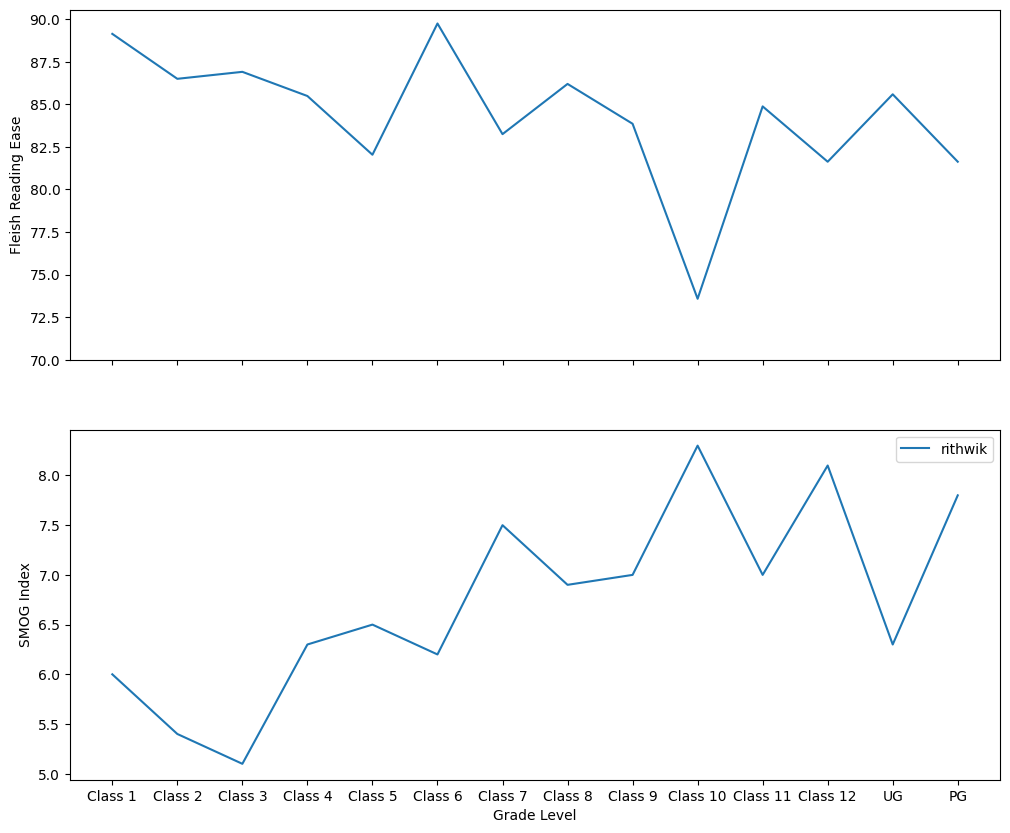

In [ ]:
import matplotlib.pyplot as plt

fig,axs=plt.subplots(2,figsize=(12,10),sharex=True)

for method in ['rithwik']:

  ease_list,grade_list,smog_list=([] for i in range(3))
  
  for key in diff_dict[method]:
    ease_list.append(diff_dict[method][key]['ease'])
    grade_list.append(diff_dict[method][key]['grade'])
    smog_list.append(diff_dict[method][key]['smog'])

  axs[0].plot(diff_dict[method].keys(),ease_list,label=method)
  axs[1].plot(diff_dict[method].keys(),smog_list,label=method)

axs[0].set_ylabel('Fleish Reading Ease')
axs[0].set_ylim(70,)
axs[1].set_ylabel('SMOG Index')
axs[1].set_xlabel('Grade Level')
plt.legend()
plt.show()

The plots show us that there seems to be no trend in the more formal transliteration methods with reading ease not changing consistently across grades. However, the more intuitive method of romanisation shows a fairly consistent trend with reading ease decreasing as grade levels increase and smog index scores increasing with and increase in grade levels.

### Method 2 - Parameter Extraction

In this method, 5 parameters are extracted from the input data. A linear model is then constructed from these parameters which is then trained and tested on using the same data described above. 

#### Parameters

##### **1) ASL- Average Sentence Length**

Total number of words divided by total number of sentences. 


In [1]:
def asl(inp):
    inp = inp.split('।')
    sentence_cnt = len(inp)
    word_cnt = 0
    for sentence in inp:
        words = sentence.strip().split(' ')
        word_cnt += len(words)
    return word_cnt/sentence_cnt

##### **2) Average Word Length (AWL)**

Number of letters/akshar in a word.

In [2]:
def awl(inp):
    words = inp.split(' ')
    words_f = len(words)
    word_len = 0
    for word in words:
        # word_len = 0
        for _ in word:
            if ord(_) >= ord('अ') and ord(_) <= ord('ह'):
                word_len += 1
        # print(f'{word}: {word_len}')
    return word_len/words_f

##### **3) Matra Parameters (MC: Matra count, PMW: Number of Polymatra words, JC: Jukta-akshar Count)**

a) Matra count (MC): Total number of matras  
b) Number of Polymatra words (PMW): Polymatra word >2 matras  
c) Jukta-akshar Count (JC): Total number of jukta-akshars  or consonant-conjunct (consonant with a halant (hasanta) followed by
another consonant) 

We have deviated from the original paper and implemented (in our opinion) a far more authentic version to count syllables. The original paper counts syllables based on visual units, while our method is based on phonetics described below:

The method used to count syllables was proposed by [Pingala in his Chandaḥśāstra](https://kavitakipathshala.wordpress.com/suggested-reading/counting-matras/). The Pingala method counts the number of matras in a word instead of the number of syllables. A matra is a vowel sound that is attached to a consonant in the Hindi language.

The Pingala method for counting matras is as follows:

1.  If aadha-letter is detected, for example, सत्य mein त्, then just preceding mai check if the preceding letter is not any of the following: ा , ी , ू , े, ै , ो, ौ , ां, ः. If it is not, then matra_cnt+=1; else, nothing is added.
2.   If the letter is क्ष, त्र, ज्ञ, द्ध, or द्व, then matra_cnt+=2.
3. If the letter is ा , ी , ू , े, ै , ो, ौ , ां, ः, then matra_cnt+=1.
4. If the letter is अ, इ, उ + ऋ+ चन्द्र बिन्दु, then matra_cnt+=1.
5. If the letter is ि, ु, ृ, ँ, ॅ, then matra_cnt+=0.
6. If the letter is any vyanjan, then matra_cnt+=1.

Using this method, we have developed a program that can accurately count the number of matras in a word and determine the readability of a given text.


In [3]:
def matra_cnt(inp):
    words = inp.split(' ')
    polysyll = 0
    syll_cnt = 0
    juk_cnt = 0
    for word in words:
        matra_cnt = 0
        for ind,_ in enumerate(word):
            if ord(_) >= ord('अ') and ord(_) <= ord('औ'):
                matra_cnt += 2
                if _ == 'अ' or _ == 'इ' or _ == 'उ' or _ == 'ऋ':
                    matra_cnt -= 1
            if ord(_) >= ord('ा') and ord(_) <= ord('ौ'):
                matra_cnt += 1
                if ord(_) == ord('ि') or ord(_) == ord('ु') or _ == 'ृ' or _ == 'ँ':
                    matra_cnt -= 1
            elif ord(_) >= ord('क') and ord(_) <= ord('ह'):
                matra_cnt += 1
            elif _ == '्':
                juk_cnt += 1
                if ind >= 2:
                    matra_cnt += 1
                    if ord(word[ind-2]) >= ord('क') and ord(word[ind-2]) <= ord('ह'):
                        matra_cnt -= 1
                    elif word[ind-2] == 'ि' or word[ind-2] == 'ु' or word[ind-2] == 'ृ' or word[ind-2] == 'ँ':
                        matra_cnt -= 1
                    elif ord(word[ind-2]) >= ord('ा') and ord(word[ind-2]) <= ord('ौ'):
                        matra_cnt -= 2
                    elif word[ind-2] == 'अ' or word[ind-2] == 'इ' or word[ind-2] == 'उ' or word[ind-2] == 'ऋ':
                        matra_cnt -= 1
                    elif ord(word[ind-2]) >= ord('आ') and ord(word[ind-2]) <= ord('औ'):
                        matra_cnt -= 2
                else:
                    matra_cnt -= 1
        syll_cnt += matra_cnt
        if matra_cnt > 2:
            polysyll += 1
    return (polysyll, syll_cnt, juk_cnt)

#### Model

 The model uses the following input structure: asl,awl,pmw,mc,jc 

In [14]:
def model1(inp):
  ret_li = [awl(inp),asl(inp),matra_cnt(inp)[0]]
  return ret_li

In [15]:
def model2(inp):
    ret_li = [awl(inp),asl(inp)]
    ret_li.extend(list((matra_cnt(inp))))
    return ret_li

In [16]:
import os
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

##### Training the model

The data was split using an 80-20 split criteria. The data is being uploaded from separate folders after being passed through the [train_test_split](https://github.com/akashkb-a01/Hindi-Readability/blob/main/train_test_split.ipynb) function

In [17]:
dic = {}
for i in os.listdir('./train'):
    txt = ''''''
    with open(f'./train/{i}', 'r') as f:
        for line in f:
            txt += line
    dic[int(i.split(' ')[1].split('.')[0])] = model1(txt)
dic = dict(sorted(dic.items()))
dic

{1: [1.1619385342789599, 18.569767441860463, 609],
 2: [1.6801493466085875, 14.30622009569378, 1689],
 3: [1.7870408584399504, 13.074712643678161, 1356],
 4: [2.112054794520548, 14.382716049382717, 2223],
 5: [2.034029389017788, 15.415254237288135, 2330],
 6: [1.9924281790512954, 7.004728132387707, 7701],
 7: [2.196326109391125, 15.304347826086957, 14514],
 8: [2.43395968256864, 88.0, 14212],
 9: [2.1487230846269405, 14.987240829346092, 5897],
 10: [2.4018108023727756, 23.21410579345088, 6043],
 11: [2.2079103738549146, 18.227110582639714, 9784],
 12: [2.2745935197099074, 24.045387994143486, 10443],
 13: [2.066588183356633, 17.218498659517426, 8182]}

The models params for the respective grades (asl,awl,pmw,mc,jc)

In [18]:
y = np.array(list(dic.keys()))
x = np.array(list(dic.values()))

In [19]:
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [20]:
reg.coef_

array([ 6.32004967e+00, -4.70656069e-02,  3.30719853e-04])

The asl parameters seem to be more indicative of reading ease due to the larger coefficient values while the other parameters seems to be less indicative. We expect positive values for all the coefficients since they are all indicative of an increase in difficulty. The asl param

##### Testing

In [21]:
dic = {}
for i in os.listdir('./test'):
    txt = ''''''
    with open(f'./test/{i}', 'r') as f:
        for line in f:
            txt += line
    y = reg.predict(np.array(model1(txt)).reshape(1,3))
    dic[int(i.split(' ')[1].split('.')[0])] = y
dic = dict(sorted(dic.items()))
dic

{1: array([-0.77831815]),
 2: array([3.10771989]),
 3: array([4.43203327]),
 4: array([6.10227738]),
 5: array([5.94596962]),
 6: array([7.24391497]),
 7: array([9.388269]),
 8: array([9.07614006]),
 9: array([6.5038272]),
 10: array([8.17073428]),
 11: array([7.83507928]),
 12: array([8.28462544]),
 13: array([6.57519628])}

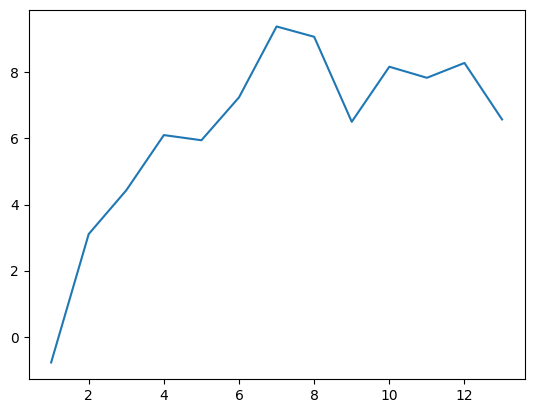

In [22]:
plt.plot(dic.keys(),dic.values())

In [23]:
dic = {}
for i in os.listdir('./train'):
    txt = ''''''
    with open(f'./train/{i}', 'r') as f:
        for line in f:
            txt += line
    dic[int(i.split(' ')[1].split('.')[0])] = model2(txt)
dic = dict(sorted(dic.items()))
dic

{1: [1.1619385342789599, 18.569767441860463, 609, 2973, 76],
 2: [1.6801493466085875, 14.30622009569378, 1689, 8171, 125],
 3: [1.7870408584399504, 13.074712643678161, 1356, 6482, 114],
 4: [2.112054794520548, 14.382716049382717, 2223, 11367, 303],
 5: [2.034029389017788, 15.415254237288135, 2330, 11617, 292],
 6: [1.9924281790512954, 7.004728132387707, 7701, 38651, 1667],
 7: [2.196326109391125, 15.304347826086957, 14514, 75103, 3589],
 8: [2.43395968256864, 88.0, 14212, 74581, 4012],
 9: [2.1487230846269405, 14.987240829346092, 5897, 31140, 1300],
 10: [2.4018108023727756, 23.21410579345088, 6043, 32492, 1561],
 11: [2.2079103738549146, 18.227110582639714, 9784, 51885, 1952],
 12: [2.2745935197099074, 24.045387994143486, 10443, 56059, 2168],
 13: [2.066588183356633, 17.218498659517426, 8182, 41749, 931]}

The models params for the respective grades (asl,awl,pmw,mc,jc)

In [24]:
y = np.array(list(dic.keys()))
x = np.array(list(dic.values()))

In [25]:
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [26]:
reg.coef_

array([ 4.45587281e+00,  1.11655207e-02, -5.59376589e-03,  1.43351529e-03,
       -6.34877257e-03])

We expect positive values for all the coefficients since they are all indicative of an increase in difficulty. The '' parameters seem to be more indicative of reading ease due to the larger coefficient values while the '' parameters seems to be less indicative. However they are larger than 0 and statistical testing can confirm whether they are significant to the model.

##### Testing

In [27]:
dic = {}
for i in os.listdir('./test'):
    txt = ''''''
    with open(f'./test/{i}', 'r') as f:
        for line in f:
            txt += line
    y = reg.predict(np.array(model2(txt)).reshape(1,5))
    dic[int(i.split(' ')[1].split('.')[0])] = y
dic = dict(sorted(dic.items()))
dic

{1: array([-0.37558649]),
 2: array([2.75085127]),
 3: array([3.4636344]),
 4: array([5.0598668]),
 5: array([4.81458026]),
 6: array([4.22953334]),
 7: array([3.77274148]),
 8: array([8.42591055]),
 9: array([6.63604335]),
 10: array([7.16077842]),
 11: array([8.40672533]),
 12: array([10.38288049]),
 13: array([8.46682321])}

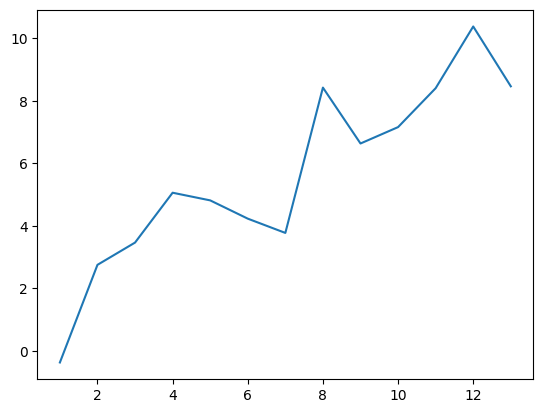

In [28]:
plt.plot(dic.keys(),dic.values())

We can see a clear trend in the data as our predicted grade levels increase with an increase in actual grade levels

### Summary

### Extra

#### IndicTrans

In [29]:
!git clone https://github.com/libindic/indic-trans.git

%cd indic-trans
!pip install -r requirements.txt
!pip install .

Cloning into 'indic-trans'...
remote: Enumerating objects: 2225, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
^Cceiving objects:  19% (432/2225), 19.22 MiB | 532.00 KiB/s
[Errno 2] No such file or directory: 'indic-trans'
/home/akash/Downloads/cgs402/readibility
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Defaulting to user installation because normal site-packages is not writeable
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
from indictrans import Transliterator

ImportError: ignored